In [61]:
import os
import numpy as np
from vae import VAE
import subprocess
import pickle

In [62]:
import matplotlib.pyplot as plt
from imageio import imwrite
from img2midi import image2midi
from midi2audio import FluidSynth
from IPython.display import Audio

In [65]:
IMAGES_PATH = "dataset/groove2img_npy/"
MODEL_PATH = 'model'

In [66]:
parameters_path = os.path.join(MODEL_PATH, 'parameters.pkl')

with open(parameters_path, "rb") as f:
    parameters = pickle.load(f)
    
parameters

[(106, 100, 1), (32, 64, 64, 64), (3, 3, 3, 3), (1, 1, 1, 2), 2]

In [67]:
def load_groove(dataset_path):
    x_train = []
    file_names = os.listdir(dataset_path)

    for file_name in file_names:
        if file_name.endswith('.npy'):
            file_path = os.path.join(dataset_path, file_name)
            g2i = np.load(file_path)
            x_train.append(g2i)

    x_train = np.array(x_train)
    x_train = x_train.astype("float32") / 255
    x_train = x_train.reshape(x_train.shape + (1,))

    #print(x_train.shape)

    return x_train

In [68]:
def select_images(images, labels, num_images=10):
    sample_images_index = np.random.choice(range(len(images)), num_images)
    sample_images = images[sample_images_index]
    sample_labels = labels[sample_images_index]
    return sample_images, sample_labels

def plot_reconstructed_images(images, reconstructed_images):
    fig = plt.figure(figsize=(15, 3))
    num_images = len(images)
    for i, (image, reconstructed_image) in enumerate(zip(images, reconstructed_images)):
        image = image.squeeze()
        ax = fig.add_subplot(2, num_images, i + 1)
        ax.axis("off")
        ax.imshow(image) #, cmap="gray_r")
        reconstructed_image = reconstructed_image.squeeze()
        ax = fig.add_subplot(2, num_images, i + num_images + 1)
        ax.axis("off")
        ax.imshow(reconstructed_image) #, cmap="gray_r")
    plt.show()
    
def plot_images_encoded_in_latent_space(latent_representations, sample_labels):
    plt.figure(figsize=(10, 10))
    plt.scatter(latent_representations[:, 0],
                latent_representations[:, 1],
                cmap="rainbow",
                c=sample_labels,
                alpha=0.5,
                s=2)
    plt.colorbar()
    plt.show()

In [69]:
# load model
autoencoder = VAE.load(MODEL_PATH)

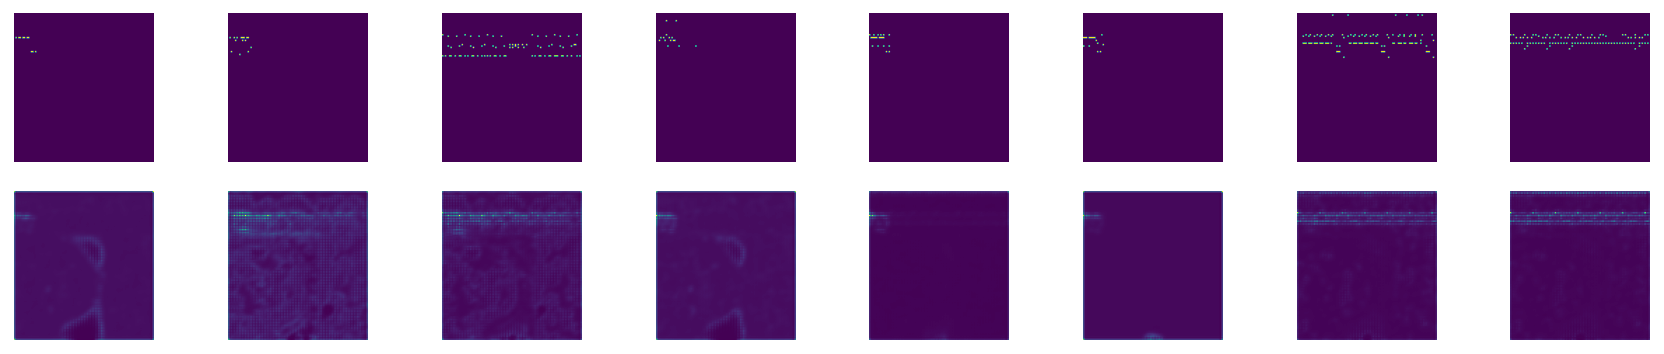

In [70]:
#x_train, y_train, x_test, y_test = load_mnist()
x_train = load_groove(IMAGES_PATH)

x_test = x_train
y_test = x_train

num_sample_images_to_show = 8
sample_images, _ = select_images(x_test, y_test, num_sample_images_to_show)
reconstructed_images, _ = autoencoder.reconstruct(sample_images)
plot_reconstructed_images(sample_images, reconstructed_images)

#num_images = 60
#sample_images, sample_labels = select_images(x_test, [0,1], num_images)
#_, latent_representations = autoencoder.reconstruct(sample_images)
#plot_images_encoded_in_latent_space(latent_representations, sample_labels)

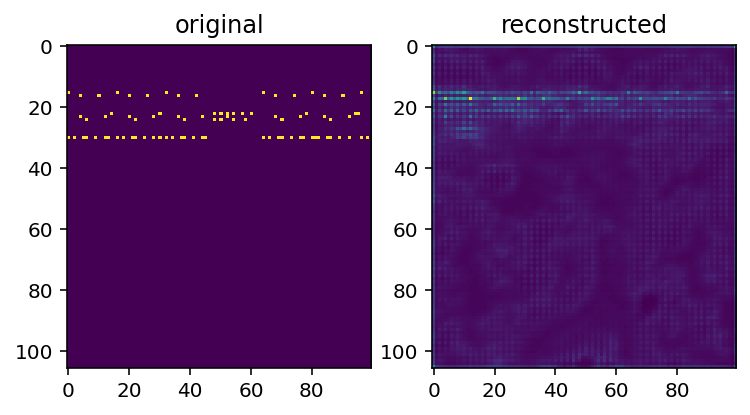

Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


1.0 0.0
1.0 0.0034648904


In [73]:
index_to_show = 2

original_image = sample_images[index_to_show].squeeze()
generated_image = reconstructed_images[index_to_show].squeeze()

# min max norm
generated_image *= (1.0/generated_image.max())
original_image *= (1.0/original_image.max())

fig, axs = plt.subplots(1,2)
axs[0].imshow(original_image) #, cmap='gray')
axs[0].set_title('original')

axs[1].imshow(generated_image) #, cmap='gray')
axs[1].set_title('reconstructed')
plt.show()

print(original_image.max(), original_image.min())
print(generated_image.max(), generated_image.min())

#save images to file
imwrite('generations/orig.png', original_image)
imwrite('generations/gen.png', generated_image)

# convert images 2 midi
image2midi('generations/orig.png', 'generations/')
image2midi('generations/gen.png', 'generations')